In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Server:
    def __init__(self, speed):
        self.speed = speed
        self.work_time = 0

    def process_file(self, file_size):
        time_taken = file_size / self.speed
        self.work_time += time_taken
        return time_taken

In [14]:
def generate_requests_1(sim_time, lambda_val):
    requests = []

    for t in range(sim_time):
        num_requests = np.random.poisson(lambda_val)
        curr_interval_requests = []

        for _ in range(num_requests):
            file_type = np.random.choice(["large", "small"])  # Randomly choose file type
            if file_type == "large":
                file_size = int(np.random.normal(10**8, 10**7))  # Gaussian distribution around 10^8 bits for large files
                file_size = max(file_size, 10**6)  # Ensure file size is at least 1MB
            else:
                file_size = int(np.random.normal(10**3, 10**2))  # Gaussian distribution around 10^3 bits for small files
                file_size = max(file_size, 10)  # Ensure file size is at least 10 bits
            curr_interval_requests.append(file_size)
        requests.append(curr_interval_requests)

    return requests

In [4]:
def generate_requests_2(sim_time, lambda_val):
    requests = []

    for t in range(sim_time):
        num_requests = np.random.poisson(lambda_val)
        curr_interval_requests = []

        for _ in range(num_requests):
            file_size = random.uniform(500, 5*10**7)
            curr_interval_requests.append(file_size)
        requests.append(curr_interval_requests)

    return requests

In [5]:
def plot_requests(requests_list, threshold):
    small_files = []
    large_files = []

    for interval_requests in requests_list:
        for file_size in interval_requests:
            if file_size < threshold:
                small_files.append(file_size)
            else:
                large_files.append(file_size)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].hist(small_files, bins=50, density=True, alpha=0.6, color='b')
    axs[0].set_title('Histogram of Small File Sizes')
    axs[0].set_xlabel('File Size (bits)')
    axs[0].set_ylabel('Probability Density')
    axs[0].grid(True)

    axs[1].hist(large_files, bins=50, density=True, alpha=0.6, color='r')
    axs[1].set_title('Histogram of Large File Sizes')
    axs[1].set_xlabel('File Size (bits)')
    axs[1].set_ylabel('Probability Density')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [6]:
# available server is always preferred, if both are available then fast is preferred

def simulation_1(requests, fast_server, slow_server, threshold):
    total_time = []

    for t in range(len(requests)):
        for request in requests[t]:
            if fast_server.work_time <= slow_server.work_time:
                time_taken = fast_server.process_file(request)
            else:
                time_taken = slow_server.process_file(request)
        fast_server.work_time = max(fast_server.work_time, t+1)
        slow_server.work_time = max(slow_server.work_time, t+1)

    return total_time

In [7]:
# large files to fast server and small files to slow server

def simulation_2(requests, fast_server, slow_server, threshold):
    total_time = []

    for t in range(len(requests)):
        for request in requests[t]:
            if request >= threshold:
                time_taken = fast_server.process_file(request)
            else:
                time_taken = slow_server.process_file(request)
        fast_server.work_time = max(fast_server.work_time, t+1)
        slow_server.work_time = max(slow_server.work_time, t+1)

    return total_time

In [8]:
# large files are always served by fast server
# if fast server is idle, it also serves small files

def simulation_3(requests, fast_server, slow_server, threshold):
    total_time = []

    for t in range(len(requests)):
        for request in requests[t]:
            if request >= threshold or fast_server.work_time <= slow_server.work_time:
                time_taken = fast_server.process_file(request)
            else:
                time_taken = slow_server.process_file(request)
        fast_server.work_time = max(fast_server.work_time, t+1)
        slow_server.work_time = max(slow_server.work_time, t+1)

    return total_time

In [23]:
tasks = []
time_taken = []

for r in range(10):
    lambda_val = 10  # average rate of requests per unit time
    sim_time = 100 * (r+1)  # simulation time in seconds
    threshold = 10**6  # Threshold size to differentiate between large and small files (e.g., 1MB)
    requests_1 = generate_requests_1(sim_time, lambda_val)
    curr_time_taken = []
    fs_speed = 10**6
    ss_speed = 100
    tasks.append(sim_time)
    # plot_requests(requests_1, threshold)

    fs = Server(fs_speed)
    ss = Server(ss_speed)
    simulation_1(requests_1, fs, ss, threshold)
    curr_time_taken.append(max(fs.work_time, ss.work_time))

    fs = Server(fs_speed)
    ss = Server(ss_speed)
    simulation_2(requests_1, fs, ss, threshold)
    curr_time_taken.append(max(fs.work_time, ss.work_time))

    fs = Server(fs_speed)
    ss = Server(ss_speed)
    simulation_3(requests_1, fs, ss, threshold)
    curr_time_taken.append(max(fs.work_time, ss.work_time))

    time_taken.append(curr_time_taken)

time_taken

[[1101330.6199999999, 49535.11191500003, 49535.11191500003],
 [1213193.1, 98739.97156999998, 98739.97156999998],
 [913576.89, 149360.31846000016, 149360.31960800017],
 [1078054.99, 196718.64274699986, 196718.64384099987],
 [1099740.38, 246031.95889199988, 246031.95889199988],
 [1019255.37, 297338.8321380005, 297338.83389100054],
 [950643.63, 341443.01627600024, 341443.01627600024],
 [1040317.02, 397084.6214430003, 397084.62345700024],
 [1063776.11, 454436.2128709999, 454436.2128709999],
 [1059373.46, 497736.7635950003, 497736.7635950003]]

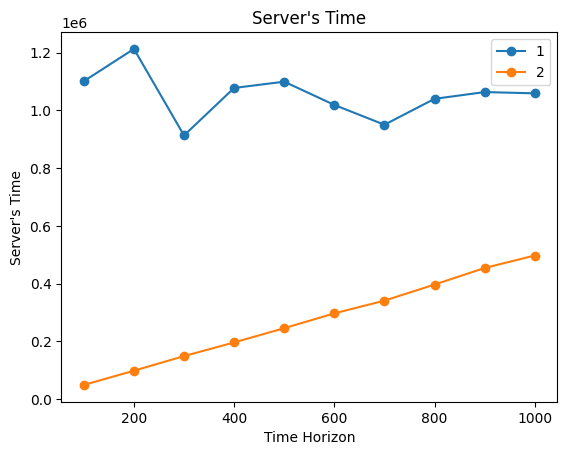

In [24]:
time = np.array(time_taken)
Labels = ['1', '2']
for col in range(2):
    y_values = time[:, col]
    plt.plot(tasks, y_values, marker='o', linestyle='-', label=f'{Labels[col]}')

# Add labels and legend
plt.xlabel('Time Horizon')
plt.ylabel("Server's Time")
plt.title("Server's Time")
plt.legend()

# Show the plot
plt.show()

####Uniform Distribution

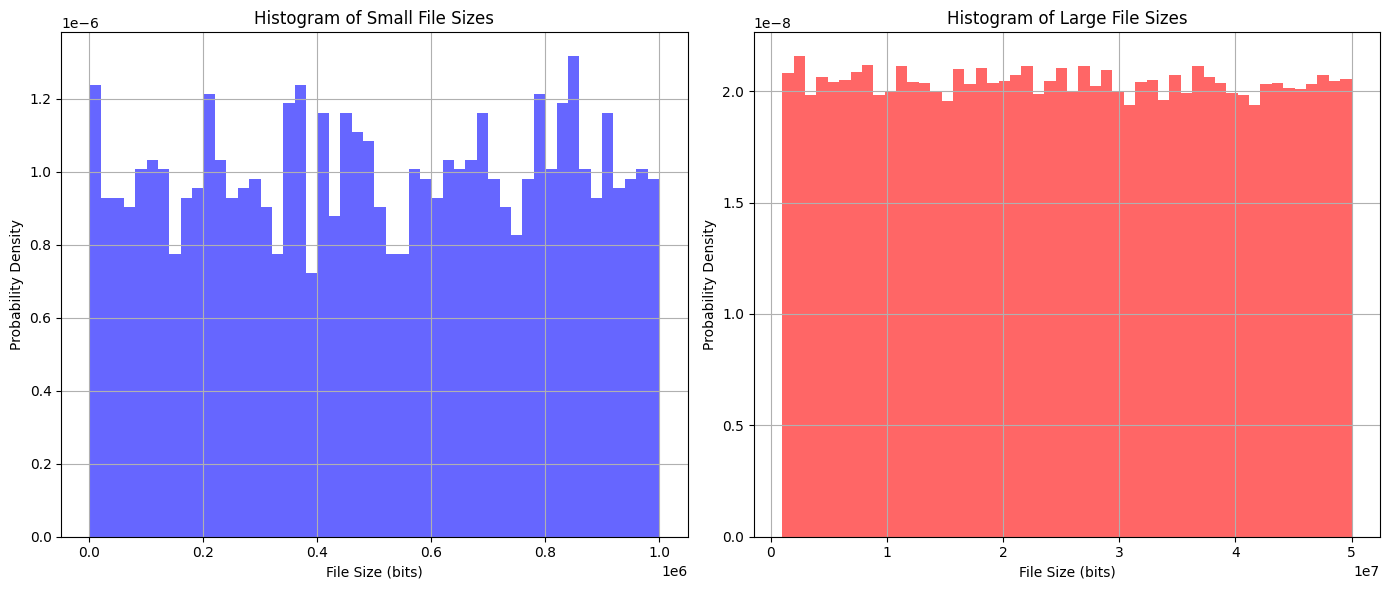

In [ ]:
requests_2 = generate_requests_2(sim_time, lambda_val)
plot_requests(requests_2, threshold)

In [ ]:
fast_server = Server(10**6)  # 1 MB/s
slow_server = Server(100)     # 100 bits/s

simulation_1(requests_2, fast_server, slow_server, threshold)
print(slow_server.work_time)
print(fast_server.work_time)

2841231.4844987458
2496156.1520949216


In [ ]:
fast_server = Server(10**6)  # 1 MB/s
slow_server = Server(100)     # 100 bits/s

simulation_2(requests_2, fast_server, slow_server, threshold)
print(slow_server.work_time)
print(fast_server.work_time)

9798500.046838172
2495460.425738686


In [ ]:
fast_server = Server(10**6)  # 1 MB/s
slow_server = Server(100)     # 100 bits/s

simulation_3(requests_2, fast_server, slow_server, threshold)
print(slow_server.work_time)
print(fast_server.work_time)

2500352.797540513
2496190.240463617
